In [132]:
from utils import data_loader
from utils.heat_map import HeatMap
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [133]:
image = imread('examples/video1_117.jpg')
image = resize(image, (480, 640))
mask = np.zeros((480, 640))
mask_ = imread('examples/video1_117.png', as_gray=True)
mask, points = data_loader.mapping_rescale_dot(mask, mask_)
transpose_points = np.transpose(points)

In [134]:
points

array([[ 90, 235],
       [ 92, 219],
       [131, 254],
       [132, 146],
       [187, 365],
       [227, 612],
       [262, 441],
       [294, 211],
       [304, 537],
       [306, 367],
       [318,  83]])

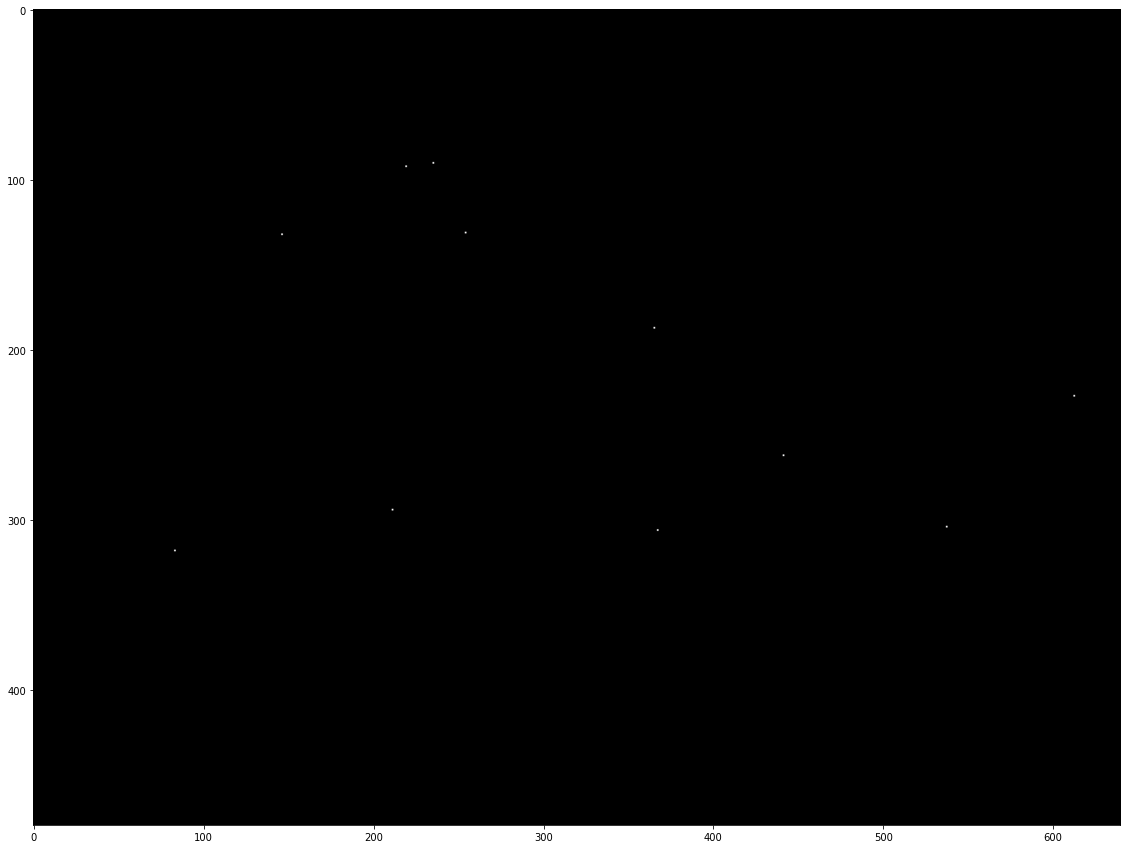

In [135]:
plt.figure(figsize=(30, 15))
plt.imshow(mask, cmap='gray')
plt.show()

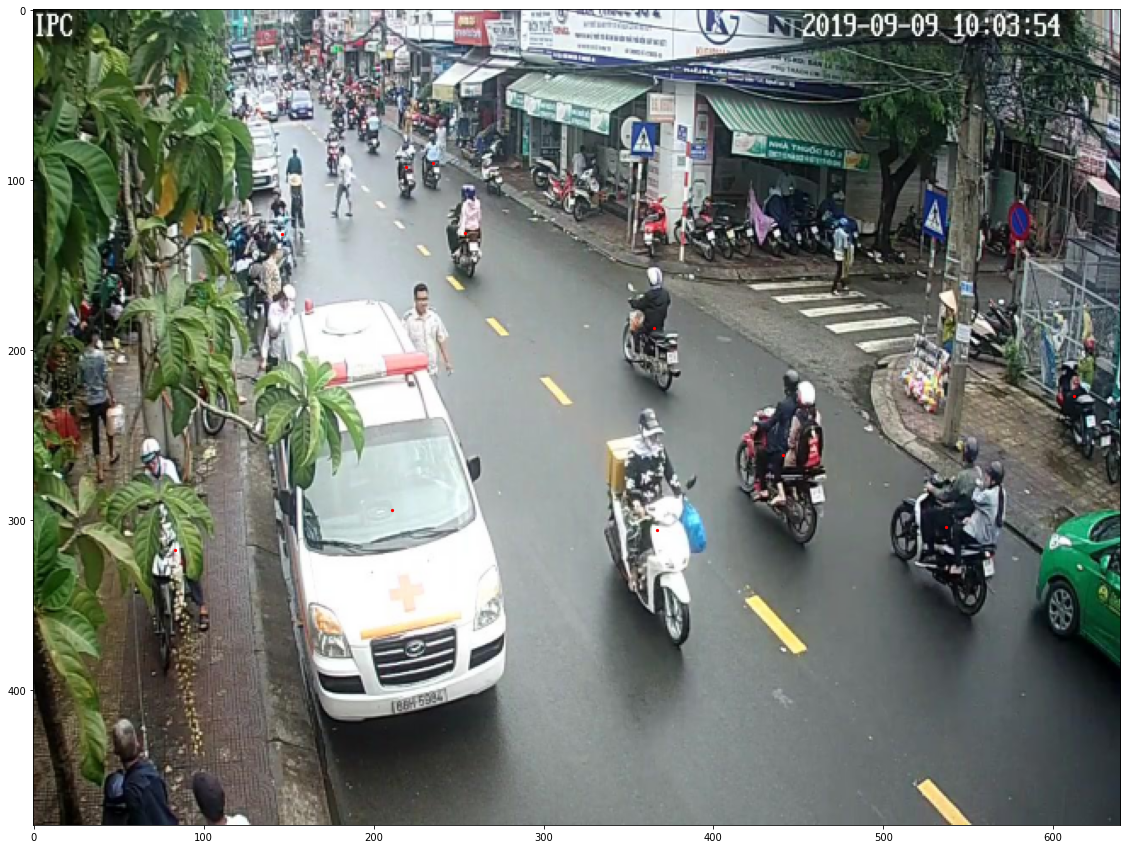

In [136]:
plt.figure(figsize=(30, 15))
plt.scatter(x=transpose_points[1], y=transpose_points[0], marker='o', color="red", s=5)
plt.imshow(image, cmap='gray')
plt.show()

In [137]:
mask_illusion = data_loader.dot_illusion(ground_truth_shape=mask.shape, points=points, gap_spaces=(15,5))
density_map_spread = data_loader.gaussian_filter_density(mask_illusion, fixed_sigma=10)

In [138]:
np.sum(density_map_spread)

10.9962015

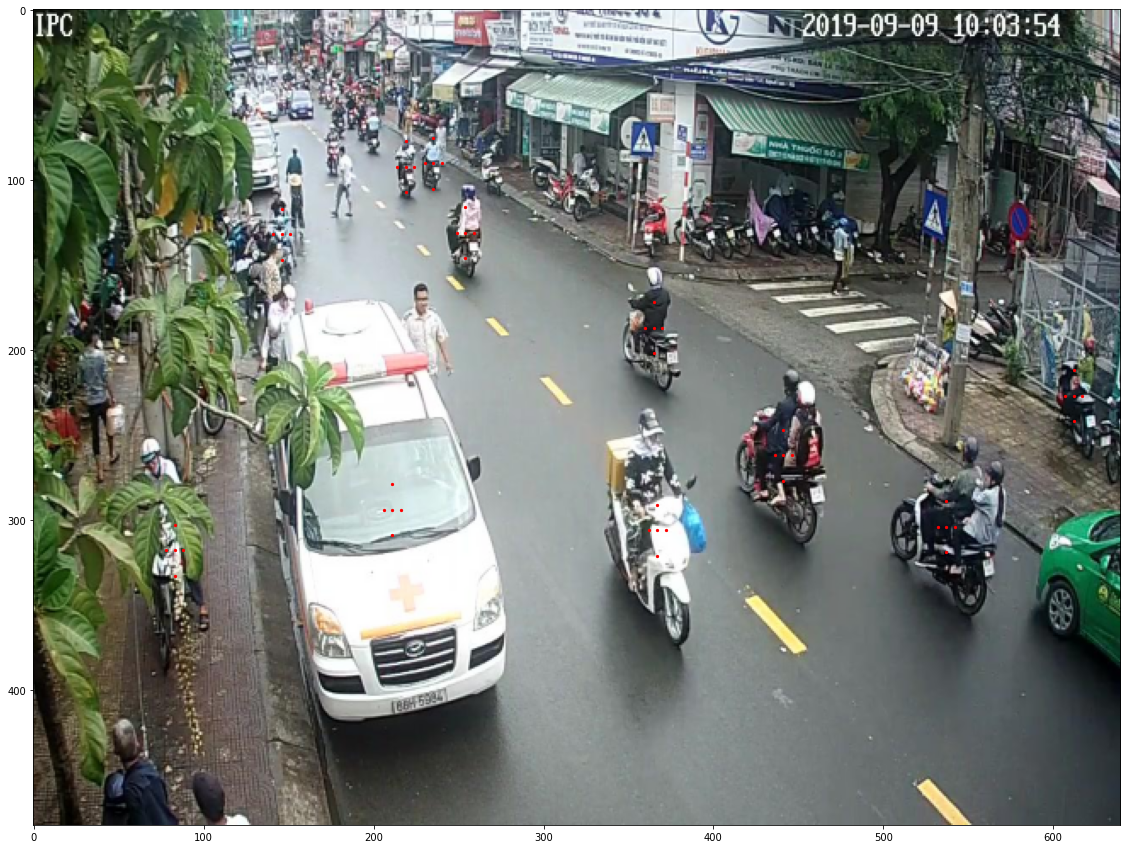

In [139]:
mask = np.zeros((480, 640))
mask, points = data_loader.mapping_rescale_dot(mask, mask_illusion)
transpose_points = np.transpose(points)

plt.figure(figsize=(30, 15))
plt.scatter(x=transpose_points[1], y=transpose_points[0], marker='o', color="red", s=5)
plt.imshow(image, cmap='gray')
plt.show()

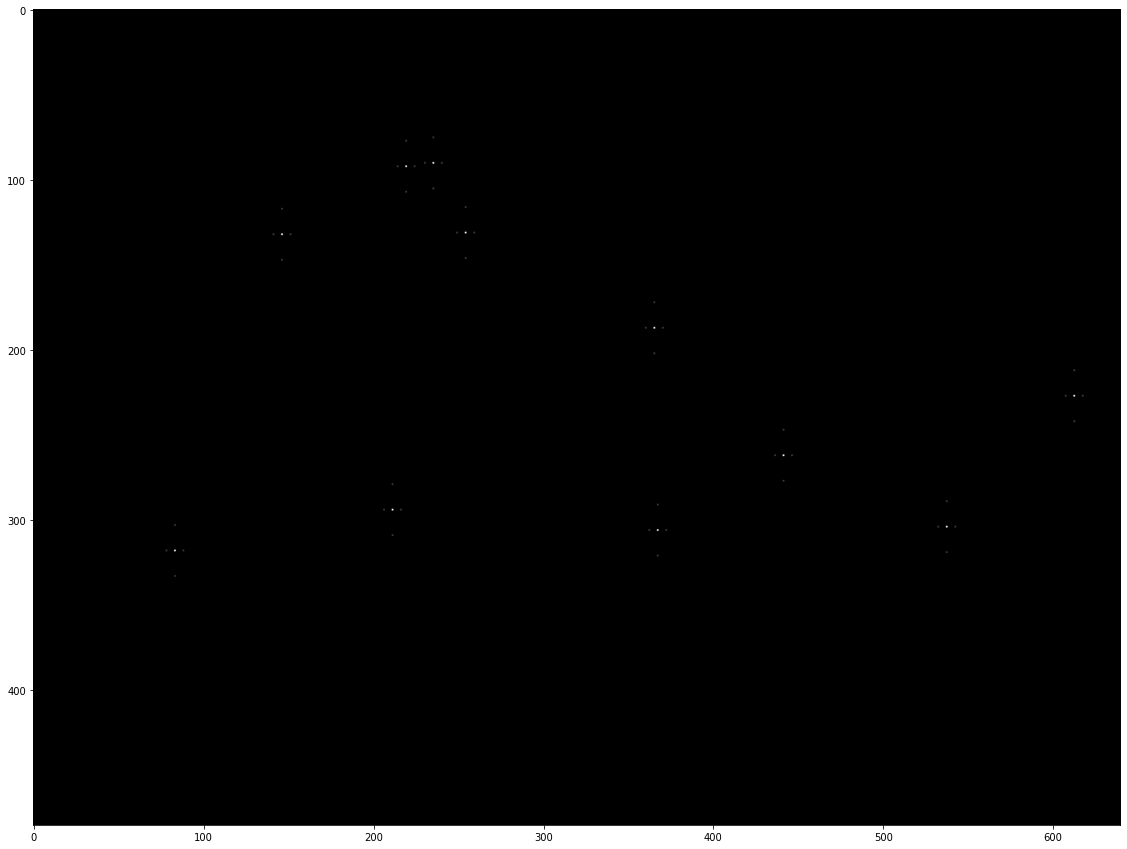

In [140]:
plt.figure(figsize=(30, 15))
plt.imshow(mask_illusion, cmap='gray')
plt.show()

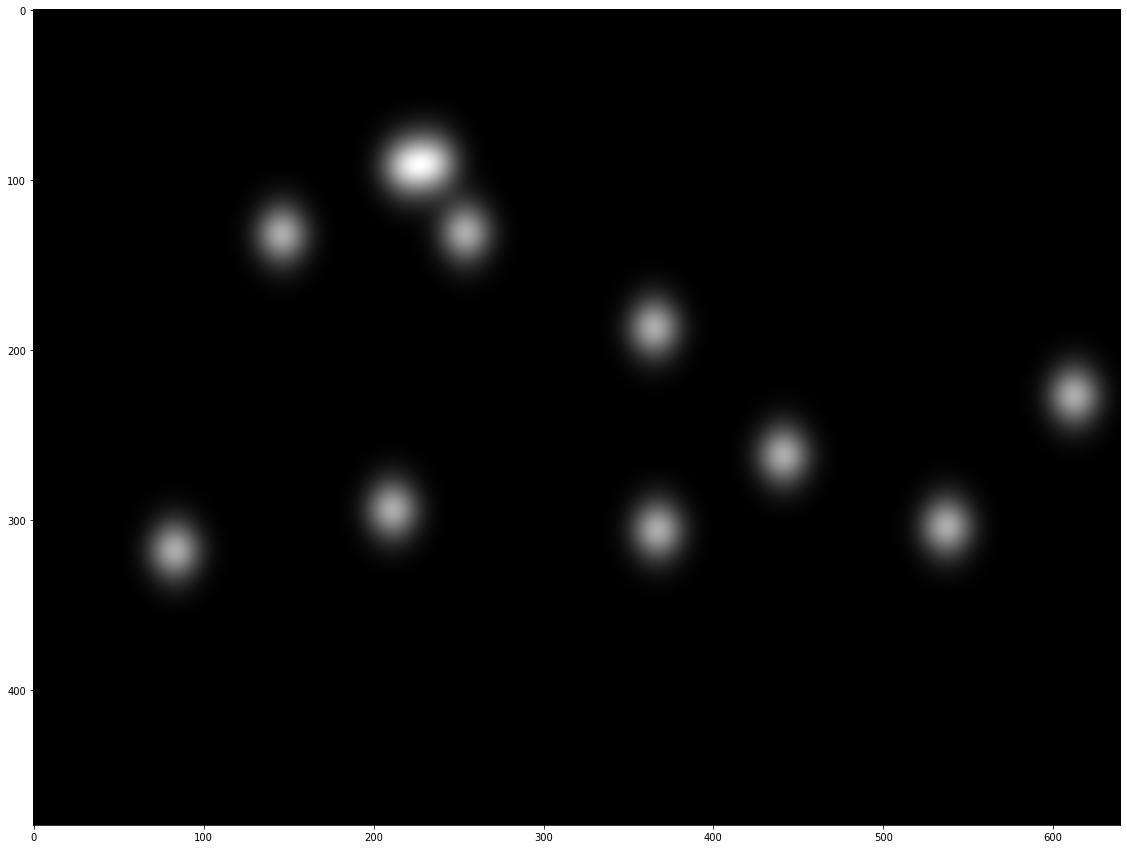

In [141]:
plt.figure(figsize=(30, 15))
plt.imshow(density_map_spread, cmap='gray')
plt.show()

In [142]:
np.sum(mask_illusion)

11.0

In [143]:
np.sum(density_map_spread)

10.9962015

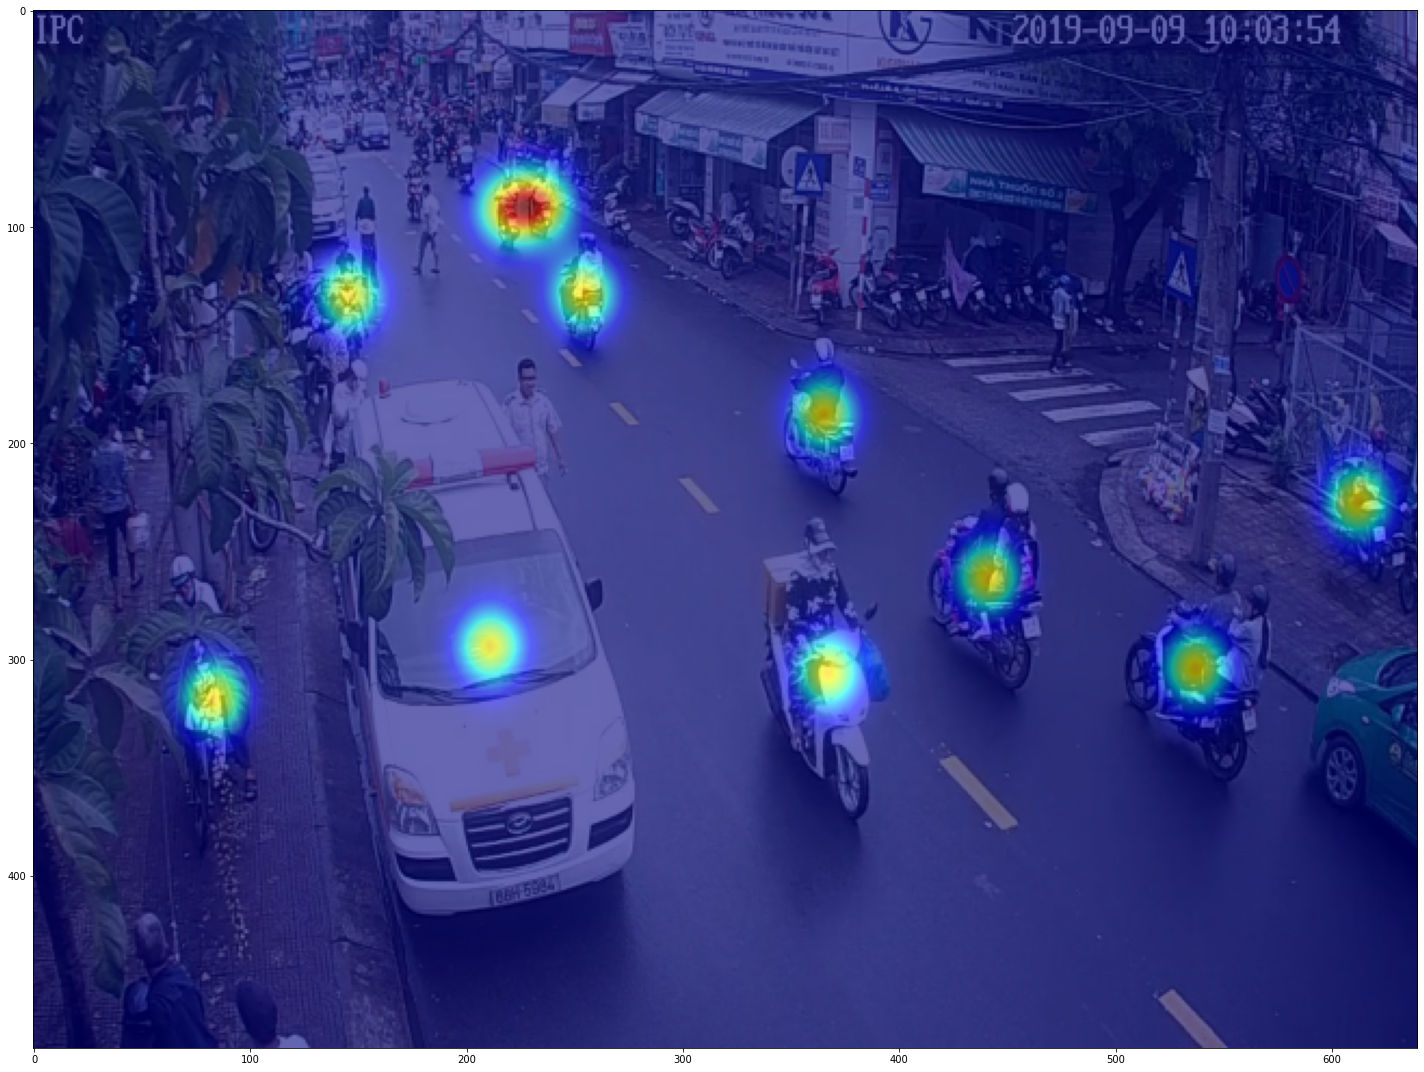

In [144]:
hm = HeatMap(image, density_map_spread, gaussian_std=0)
hm.plot(transparency=0.6, color_map='jet', show_axis=True, figure_size=(30, 15))